In [74]:
import tensorflow as tf

In [75]:
# Import Tokenizer and pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import numpy and pandas
import numpy as np
import pandas as pd

In [76]:
# Read the csv file
dataset = pd.read_csv("data.csv")

In [77]:

# Review the first few entries in the dataset
dataset.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,Good case Excellent value.,1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [78]:
# Get the reviews from the text column
reviews = dataset['text'].tolist()

In [79]:
texts = dataset['text'].values
texts
    

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case Excellent value.', 'Great for the jawbone.', ...,
       'Overall I was not impressed and would not go back.',
       "The whole experience was underwhelming and I think we'll just go to Ninja Sushi next time.",
       "Then as if I hadn't wasted enough of my life there they poured salt in the wound by drawing out the time it took to bring the check."],
      dtype=object)

In [80]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)


3259
{'<OOV>': 1, 'the': 2, 'and': 3, 'i': 4, 'a': 5, 'it': 6, 'to': 7, 'is': 8, 'was': 9, 'this': 10, 'of': 11, 'not': 12, 'for': 13, 'my': 14, 'in': 15, 'with': 16, 'very': 17, 'good': 18, 'great': 19, 'phone': 20, 'that': 21, 'on': 22, 'have': 23, 'you': 24, 'food': 25, 'had': 26, 'place': 27, 'but': 28, 'service': 29, 'so': 30, 'are': 31, 'be': 32, 'we': 33, 'all': 34, 'as': 35, 'at': 36, 'like': 37, 'they': 38, 'back': 39, 'time': 40, 'one': 41, 'were': 42, 'quality': 43, 'would': 44, 'here': 45, 'really': 46, 'if': 47, 'from': 48, 'well': 49, 'your': 50, 'just': 51, 'product': 52, 'up': 53, 'best': 54, "don't": 55, 'no': 56, 'will': 57, 'an': 58, 'there': 59, 'go': 60, 'me': 61, 'has': 62, 'only': 63, 'also': 64, 'works': 65, "i've": 66, 'out': 67, 'headset': 68, 'nice': 69, 'ever': 70, 'battery': 71, "it's": 72, 'sound': 73, 'than': 74, 'use': 75, 'or': 76, 'when': 77, "i'm": 78, 'our': 79, 'get': 80, 'what': 81, 'their': 82, 'after': 83, 'love': 84, 'been': 85, 'did': 86, 'exce

In [81]:
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, padding='post')

# What is the shape of the vector containing the padded sequences?
# The shape shows the number of sequences and the length of each one.
print(padded_sequences.shape)

# What is the first review?
print (reviews[0])

# Show the sequence for the first review
print(padded_sequences[0])

# Try printing the review and padded sequence for other elements.

(1992, 139)
So there is no way for me to plug it in here in the US unless I go by a converter.
[  30   59    8   56  142   13   61    7  269    6   15   45   15    2
  149  449    4   60  113    5 1430    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [82]:
tf.keras.layers.Embedding

keras.layers.core.embedding.Embedding

In [83]:

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [84]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [85]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


In [86]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 6)                 9606      
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [87]:
num_epochs = 20
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
50/50 [==============================] - 1s 8ms/step - loss: 0.6924 - accuracy: 0.5261 - val_loss: 0.7113 - val_accuracy: 0.4110
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5229 - val_loss: 0.6992 - val_accuracy: 0.4110
Epoch 3/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5248 - val_loss: 0.6917 - val_accuracy: 0.4511
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.5876 - val_loss: 0.6813 - val_accuracy: 0.5088
Epoch 5/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.6560 - val_loss: 0.6769 - val_accuracy: 0.4762
Epoch 6/20
50/50 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7571 - val_loss: 0.6202 - val_accuracy: 0.7118
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.4219 - accuracy: 0.8920 - val_loss: 0.4993 - val_accuracy: 0.7619
Epoch 8/20
50/50 [==

In [88]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [89]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [90]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [91]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)

fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)
print(classes)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
 
  print('\n')


# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 [==============================] - 0s 102ms/step
[[0.9998624 ]
 [0.00317069]
 [0.04716052]
 [0.41977707]
 [0.17698982]
 [0.99099845]
 [0.9966564 ]
 [0.00345443]
 [0.99872905]
 [0.00229291]]
I love this phone
[0.9998624]


I hate spaghetti
[0.00317069]


Everything was cold
[0.04716052]


Everything was hot exactly as I wanted
[0.41977707]


Everything was green
[0.17698982]


the host seated us immediately
[0.99099845]


they gave us free chocolate cake
[0.9966564]


not sure about the wilted flowers on the table
[0.00345443]


only works when I stand on tippy toes
[0.99872905]



In [92]:

# Use the model to predict a review   

l=[]
# Use the model to predict a review   
fake_reviews = 'I love this phone'
l.append(fake_reviews)
print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(l)

fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

         

classes = model.predict(fakes_padded)


# The closer the class is to 1, the more positive the review is deemed to be


print(classes)



I love this phone
1/1 [==============================] - 0s 26ms/step
[[0.9998624]]


In [93]:
import joblib
pipeline_file=open("customer_review.pkl","wb")
joblib.dump(model,pipeline_file)
pipeline_file.close()

INFO:tensorflow:Assets written to: ram://aa69e1f7-581f-480c-b2cf-3dbd95ec9381/assets


In [94]:
from tensorflow.keras.models import Model, load_model 
# Save Model and Weights
model.save('F:/emotion/models/modelReview.h5')
model.save_weights('F:/emotion/models/ModelReview.hdf5')
# Load saved model
model = load_model('F:/emotion/models/ModelReview.h5')

In [95]:
"""
def predict_comments(docx):
    l=[]
    l.append(docx)
    padding_type='post'
    max_length = 100
    sample_sequences = Tokenizer.texts_to_sequences(l)
    fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

    result=model.predict(fakes_padded)

    return result
"""

"\ndef predict_comments(docx):\n    l=[]\n    l.append(docx)\n    padding_type='post'\n    max_length = 100\n    sample_sequences = Tokenizer.texts_to_sequences(l)\n    fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           \n\n    result=model.predict(fakes_padded)\n\n    return result\n"

In [96]:
padding_type='post'
vocab_size = 1000

max_length = 100

padding_type='post'
oov_tok = "<OOV>"
l=[]
def get_comment(a):

  
    l.append(a)
    padding_type='post'
    sample_sequences = tokenizer.texts_to_sequences(l)

    fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

         

    classes = model.predict(fakes_padded)
    return classes








In [97]:
classes=get_comment('I love this phone')
print(classes)

1/1 [==============================] - 0s 84ms/step
[[0.9998624]]


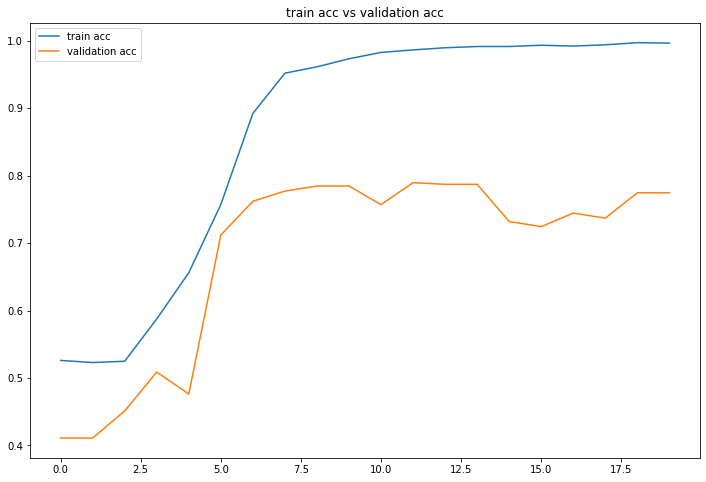

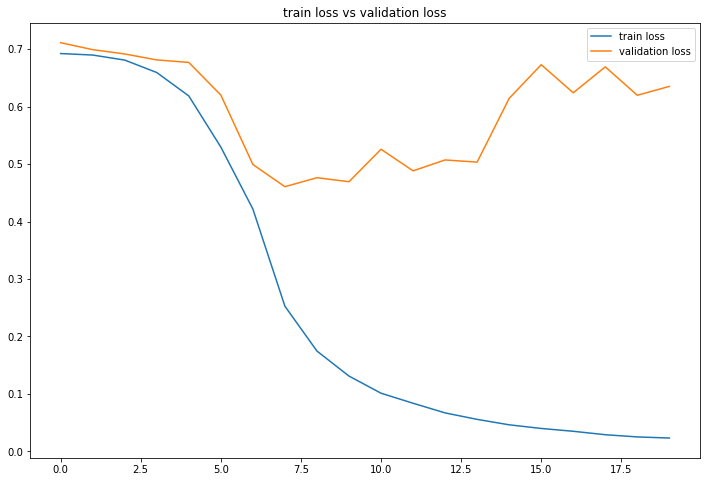

In [98]:
   import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc =history.history['val_accuracy']#validation acc
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs= len(acc)
plt.figure(figsize=(12,8))
plt.plot(np.arange(epochs),acc,label="train acc")

plt.plot(np.arange(epochs),val_acc,label="validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()
plt.figure(figsize=(12,8))
plt.plot(np.arange(epochs),loss,label="train loss")

plt.plot(np.arange(epochs),val_loss,label="validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

In [103]:
TF_LITE_MODEL_FILE_NAME="mode.tflite"

In [104]:
import tensorflow as tf
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)

In [105]:
tflite_model=tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\msi\AppData\Local\Temp\tmp5w46lyhs\assets


INFO:tensorflow:Assets written to: C:\Users\msi\AppData\Local\Temp\tmp5w46lyhs\assets


In [106]:
tflite_model_name=TF_LITE_MODEL_FILE_NAME
open(tflite_model_name,"wb").write(tflite_model)

104932